In [38]:
import H_mag_funcs
import os
from astroquery.mpc import MPC
from pprint import pprint
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import numpy as np
import seaborn as sns

In [51]:
excel_list = np.array(os.listdir(r"C:\Users\nagai\Documents\Asteroids_BF_2\T08oBF"))
print ("Number of files: ", len(excel_list))

Number of files:  117


# Obtaining the names of the asteroids from the excel sheet
### Correction for the last two

In [39]:
aster_names = [excel_name.split("-")[0] for excel_name in excel_list]
print (aster_names)
aster_names[-1] = '4239'
aster_names[-2] = '3719'
aster_names = np.array([int(asters) for asters in aster_names])
print (aster_names)

['100012', '110561', '1205', '13628', '14001', '1769', '1779', '1818', '1942', '1944', '1951', '1963', '1964', '2018', '2035', '2076', '2128', '2131', '2134', '2143', '2150', '2174', '2318', '2335', '2350', '2367', '2392', '2435', '247925', '2488', '2607', '2614', '2680', '2817', '2821', '2838', '2899', '2949', '2968', '2971', '3006', '3038', '30512', '3081', '3083', '30968', '3098', '3137', '31446', '3172', '3173', '3175', '3185', '3206', '3216', '3217', '3239', '3336', '3338', '3340', '3350', '3381', '3384', '3392', '3400', '3427', '3459', '3462', '3473', '3520', '3529', '3535', '3538', '3567', '3574', '3579', '3593', '3612', '3619', '3636', '3652', '3654', '3681', '3716', '3719', '3740', '3745', '3770', '3777', '3798', '3807', '3826', '3858', '3891', '3927', '3943', '3954', '3969', '3972', '4001', '4016', '40256', '4032', '4048', '4062', '4109', '4129', '4216', '4229', '4239', '4245', '4267', '64577', '74510', '90872', '~$3719', '~$4239']
[100012 110561   1205  13628  14001   1769  

# Choosing the best observatories

In [5]:
df = pd.read_excel(r"C:\Users\nagai\Documents\Asteroids_BF_2\1205-4267.xlsx")

In [23]:
Asteroid_list_df = df["Aster."]

In [15]:
All_obs = df.iloc[:, 1::2]

All_obs_cleaned = All_obs.iloc[:, :-1]
obj_names = All_obs_cleaned.columns
print (obj_names)

Index(['T08o', '703G', '703V', 'C57G', 'D29R', 'F51w', 'G45r', 'P07G', 'G96G',
       'G96V', 'I41r', 'M22o', 'T05c', 'T05o', 'T08c', 'W68o', 'I41g', 'T05w'],
      dtype='object')


In [49]:
def selecting_asteroids(obs_name):
    temp_obs = df[obs_name]
    
    # Keep only strings ending with "+"
    filtered_temp_obs = temp_obs[temp_obs.map(lambda x: isinstance(x, str) and x.endswith('+'))]

    # Get indices of strings ending with "+"
    indices = filtered_temp_obs.index
    print (indices)
    
    Asteroids_excel = np.array(Asteroid_list_df[indices])

    # keeping only the asteroids that match
    idx_keep = np.where(np.isin(aster_names, Asteroids_excel))[0]
    return idx_keep

## For a list of asteroids

In [61]:
# Input parameters
path = r"C:\Users\nagai\Documents\Asteroids_BF_2\T08oBF\\"
sheet_name = "T08o"
contamination = 0.02
outlier_removing = False
plot_bool = False

# creating the saving dictionary
all_data_dic = {}

for sheet_name in tqdm(obj_names):
    idx_for_excel = selecting_asteroids(sheet_name)
    excel_list_for_obs = excel_list[idx_for_excel]
    # Running the code
    H_dis_list = []
    for excel_name in excel_list_for_obs:
        try:
            asteroid_numb = excel_name.split("-")[0]
            result = MPC.query_object('asteroid', number = asteroid_numb)
            H_MPC = float(result[0]['absolute_magnitude'])
            # saves the HG and HG1G2 displacement
            H_displacement = H_mag_funcs.main(path, excel_name, asteroid_numb, H_MPC, contamination = 0.02, outlier_removing= outlier_removing, plot_bool = plot_bool, sheet_name = sheet_name)
            H_dis_list.append(H_displacement)
        except Exception as e:
            print(f"Asteroid number causing error: {asteroid_numb}, Error: {e}")


    all_data_dic[sheet_name] = H_dis_list

#df_all_obs = pd.DataFrame.from_dict(all_data_dic)



  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

Index([ 0,  1,  2,  4,  6,  7,  8, 14, 16, 18, 19, 20, 21, 22, 23, 24, 26, 27,
       29, 30, 31, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 46, 49, 50, 53, 56,
       57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 72, 73, 74, 76, 77, 78,
       81, 82, 83, 84, 85, 87, 88, 90, 91, 92, 95, 97],
      dtype='int64')
Asteroid number causing error: 2607, Error: 'epoch'
Asteroid number causing error: 3381, Error: Input X contains NaN.
IsolationForest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/module

  6%|████▌                                                                             | 1/18 [02:33<43:21, 153.04s/it]

Asteroid number causing error: ~$3719, Error: list index out of range
Index([ 0,  1,  2,  4,  7,  9, 10, 11, 13, 14, 16, 20, 21, 22, 23, 24, 26, 27,
       30, 36, 37, 38, 40, 41, 43, 44, 46, 49, 50, 53, 56, 58, 59, 60, 61, 64,
       65, 66, 67, 68, 72, 73, 74, 75, 76, 77, 78, 82, 83, 85, 86, 88, 90, 91,
       92, 94, 95, 97],
      dtype='int64')
Asteroid number causing error: 2131, Error: 'Ph'


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)


Asteroid number causing error: 2318, Error: 'Ph'


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)


Asteroid number causing error: 3381, Error: 'Ph'


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)


Asteroid number causing error: 3593, Error: 'Ph'
Asteroid number causing error: 4048, Error: 'magred'


 11%|█████████                                                                         | 2/18 [04:12<32:27, 121.73s/it]

Asteroid number causing error: ~$3719, Error: list index out of range
Index([ 4, 13, 16, 20, 21, 23, 26, 27, 31, 35, 37, 40, 41, 42, 50, 53, 56, 57,
       58, 59, 60, 61, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78,
       82, 83, 84, 85, 86, 88, 91, 92, 95, 98],
      dtype='int64')


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)


Asteroid number causing error: 3593, Error: 'Ph'


 17%|█████████████▋                                                                    | 3/18 [05:35<25:59, 103.97s/it]

Asteroid number causing error: ~$3719, Error: list index out of range
Index([15, 22, 26, 30, 32, 41, 42, 51, 54, 65, 68, 69, 70, 74, 98], dtype='int64')


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)


Asteroid number causing error: 2335, Error: index -1 is out of bounds for axis 0 with size 0


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)


Asteroid number causing error: 3038, Error: Worksheet named 'C57G' not found


 22%|██████████████████▍                                                                | 4/18 [06:06<17:32, 75.15s/it]

Index([ 1,  2,  7,  8, 17, 21, 23, 24, 26, 27, 31, 41, 46, 49, 50, 56, 60, 64,
       65, 68, 69, 72, 73, 74, 75, 77, 78, 81, 83, 85, 86, 88, 92, 95, 96],
      dtype='int64')


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)


Asteroid number causing error: 2018, Error: Input X contains NaN.
IsolationForest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)
C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)


Asteroid number causing error: 3338, Error: 'Ph'
Asteroid number causing error: 3381, Error: 'Ph'


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)


Asteroid number causing error: 3593, Error: 'Ph'
Asteroid number causing error: 3719, Error: Input X contains NaN.
IsolationForest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)


Asteroid number causing error: 3891, Error: 'Ph'


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)
C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)
 28%|███████████████████████                                                            | 5/18 [07:03<14:50, 68.49s/it]

Asteroid number causing error: ~$3719, Error: list index out of range
Asteroid number causing error: ~$4239, Error: list index out of range
Index([ 0,  1,  4,  7,  8, 16, 17, 19, 20, 21, 23, 24, 26, 29, 35, 37, 40, 41,
       42, 50, 54, 58, 60, 64, 65, 66, 68, 72, 73, 74, 75, 76, 78, 81, 82, 85,
       86, 87, 88, 91, 92, 93, 94, 98, 99],
      dtype='int64')


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)


Asteroid number causing error: 2367, Error: 'Ph'
Asteroid number causing error: 2680, Error: Worksheet named 'F51w' not found


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)
C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)


Asteroid number causing error: 3529, Error: 'Ph'
Asteroid number causing error: 3538, Error: Worksheet named 'F51w' not found
Asteroid number causing error: 3593, Error: 'Ph'
Asteroid number causing error: 3972, Error: Input X contains NaN.
IsolationForest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)
C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)
 33%|███████████████████████████▋                                                       | 6/18 [08:22<14:26, 72.20s/it]

Asteroid number causing error: 4267, Error: 'Ph'
Asteroid number causing error: ~$3719, Error: list index out of range
Index([ 8, 13, 16, 27, 28, 29, 31, 32, 35, 37, 50, 56, 59, 61, 64, 65, 69, 71,
       73, 76, 78, 83, 84, 85, 86, 87, 88, 94],
      dtype='int64')


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)


Asteroid number causing error: 2949, Error: 'Ph'


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)
C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)


Asteroid number causing error: 3098, Error: Worksheet named 'G45r' not found
Asteroid number causing error: 3593, Error: 'Ph'
Asteroid number causing error: 4016, Error: Worksheet named 'G45r' not found


 39%|████████████████████████████████▎                                                  | 7/18 [09:11<11:49, 64.54s/it]

Index([24, 27, 35, 40, 49, 50, 58, 66, 67, 68, 74, 78, 82, 85, 86], dtype='int64')
Asteroid number causing error: 3529, Error: 'Ph'


 44%|████████████████████████████████████▉                                              | 8/18 [09:43<09:01, 54.16s/it]

Index([ 0,  1,  2,  3,  8, 13, 14, 16, 19, 20, 21, 22, 23, 24, 26, 27, 29, 34,
       35, 36, 40, 41, 42, 43, 44, 46, 49, 50, 53, 54, 56, 57, 58, 59, 60, 61,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 80, 81, 82, 84, 85,
       86, 87, 88, 90, 92, 94, 95, 97, 98],
      dtype='int64')


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)
C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)
C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)
C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)
C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)


Asteroid number causing error: 3239, Error: 'Ph'
Asteroid number causing error: 3338, Error: 'Ph'


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)


Asteroid number causing error: 3459, Error: 'Ph'


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)


Asteroid number causing error: 3654, Error: Worksheet named 'G96G' not found


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)
C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)


Asteroid number causing error: 3891, Error: 'Ph'


 50%|█████████████████████████████████████████▌                                         | 9/18 [11:55<11:47, 78.62s/it]

Asteroid number causing error: ~$3719, Error: list index out of range
Index([21, 23, 24, 32, 34, 35, 36, 40, 42, 50, 56, 58, 59, 64, 66, 67, 68, 71,
       72, 73, 75, 76, 77, 80, 81, 82, 85, 88, 94, 97],
      dtype='int64')


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)
C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)


Asteroid number causing error: 3593, Error: 'Ph'


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)
C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)
C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)


Asteroid number causing error: 3891, Error: 'Ph'


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)
C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)
 56%|█████████████████████████████████████████████▌                                    | 10/18 [12:50<09:30, 71.31s/it]

Asteroid number causing error: ~$3719, Error: list index out of range
Index([ 0,  2,  3, 10, 19, 20, 22, 27, 40, 42, 44, 53, 56, 64, 65, 75, 76, 78,
       81, 84, 88, 92],
      dtype='int64')


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)


Asteroid number causing error: 2035, Error: Worksheet named 'I41r' not found
Asteroid number causing error: 3593, Error: 'Ph'


 61%|██████████████████████████████████████████████████                                | 11/18 [13:29<07:09, 61.34s/it]

Index([19, 23, 40, 46, 50, 56, 65, 69, 71, 74, 77, 83, 90, 91], dtype='int64')
Asteroid number causing error: 3338, Error: 'Ph'


 67%|██████████████████████████████████████████████████████▋                           | 12/18 [13:57<05:07, 51.27s/it]

Index([ 1,  4,  7,  8, 13, 14, 16, 19, 20, 21, 22, 23, 24, 26, 27, 34, 35, 36,
       38, 40, 41, 43, 44, 46, 49, 50, 54, 56, 57, 58, 59, 60, 61, 64, 65, 66,
       68, 69, 71, 72, 73, 74, 76, 77, 78, 81, 82, 84, 85, 86, 87, 88, 92, 94,
       95, 97, 98],
      dtype='int64')


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)


Asteroid number causing error: 2817, Error: 'Ph'
Asteroid number causing error: 3239, Error: Input X contains NaN.
IsolationForest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
Asteroid number causing error: 3338, Error: 'Ph'
Asteroid number causing error: 3459, Error: 'Ph'
Asteroid number causing error: 3593, Error: 'Ph'
Asteroid number causing error: 3619, Error: 'Ph'


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)


Asteroid number causing error: 3972, Error: Input X contains NaN.
IsolationForest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


 72%|███████████████████████████████████████████████████████████▏                      | 13/18 [15:38<05:31, 66.36s/it]

Asteroid number causing error: 4267, Error: 'Ph'
Asteroid number causing error: ~$3719, Error: list index out of range
Index([ 0,  1,  2,  3,  4,  7,  8,  9, 14, 16, 19, 20, 21, 22, 23, 24, 26, 27,
       29, 30, 31, 34, 35, 36, 37, 41, 46, 49, 50, 53, 54, 56, 59, 60, 61, 63,
       64, 65, 66, 68, 69, 71, 72, 73, 74, 76, 77, 78, 80, 81, 82, 83, 84, 86,
       88, 91, 92, 94, 95, 97, 98, 99],
      dtype='int64')


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)


Asteroid number causing error: 2131, Error: 'Ph'
Asteroid number causing error: 3338, Error: 'Ph'
Asteroid number causing error: 3381, Error: 'Ph'
Asteroid number causing error: 3459, Error: 'Ph'
Asteroid number causing error: 3593, Error: 'Ph'


 78%|███████████████████████████████████████████████████████████████▊                  | 14/18 [17:57<05:52, 88.09s/it]

Asteroid number causing error: 4267, Error: 'Ph'
Asteroid number causing error: ~$3719, Error: list index out of range
Index([7, 24, 27, 36, 49, 78, 80, 83, 93, 99], dtype='int64')


 83%|████████████████████████████████████████████████████████████████████▎             | 15/18 [18:17<03:22, 67.56s/it]

Asteroid number causing error: 4129, Error: Worksheet named 'T08c' not found
Index([ 0,  1,  4, 13, 16, 19, 20, 22, 23, 34, 35, 40, 46, 49, 50, 54, 56, 58,
       61, 64, 65, 66, 67, 68, 69, 72, 74, 75, 76, 77, 78, 81, 82, 83, 84, 85,
       86, 88, 91, 92, 97, 98],
      dtype='int64')


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)


Asteroid number causing error: 3338, Error: 'Ph'


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)


Asteroid number causing error: 3459, Error: 'Ph'
Asteroid number causing error: 3529, Error: 'Ph'
Asteroid number causing error: 3593, Error: 'Ph'


 89%|████████████████████████████████████████████████████████████████████████▉         | 16/18 [19:37<02:22, 71.34s/it]

Asteroid number causing error: 4245, Error: Input X contains NaN.
IsolationForest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
Asteroid number causing error: 4267, Error: 'Ph'
Asteroid number causing error: ~$3719, Error: list index out of range
Index([2, 4, 5, 22], dtype='int64')


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)


Asteroid number causing error: 1951, Error: index -1 is out of bounds for axis 0 with size 0


 94%|█████████████████████████████████████████████████████████████████████████████▍    | 17/18 [19:43<00:51, 51.89s/it]

Index([27, 65, 77, 80, 83], dtype='int64')


C:\Users\nagai\Documents\Asteroid work\H_mag_funcs.py:182: RuntimeWarning: invalid value encountered in log10
  V = H - 2.5 * np.log10((1 - G) * phi1 + G * phi2)
100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [19:51<00:00, 66.21s/it]


ValueError: All arrays must be of the same length

In [63]:
df_all_obs = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in all_data_dic.items()]))


In [64]:
df_all_obs

,T08o,703G,703V,C57G,D29R,F51w,G45r,P07G,G96G,G96V,I41r,M22o,T05c,T05o,T08c,W68o,I41g,T05w
0,"[0.10579184097157768, 0.10304786946999833]","[0.30202352984474157, 0.3032076747776067]","[0.011497003004556028, 0.003175883948603797]","[0.26913796303967175, 0.2873999058229275]","[0.16790255766543183, 0.168007453583634]","[0.25376940061830666, 0.2731717625200636]","[0.5273629116492993, 0.5300167502238944]","[0.0797589587308849, 0.08920823670185118]","[0.29745003123524505, 0.29661637624498205]","[0.15102007506689308, 0.1511061733984027]","[0.1335731686057091, 0.13310820969671155]","[-0.014364820153801361, -0.031020818212539325]","[0.3582008064277735, 0.3538322440637849]","[0.07330173958269448, 0.0642106614370146]","[0.4626312532384329, 0.46405528122962725]","[0.05647302321266512, 0.05787610482097261]","[0.560237905447762, 0.5584493686665937]","[0.35735658922286895, 0.40402718007397187]"
1,"[-0.04827658084786357, -0.04899596496273961]","[0.15387773346890032, 0.1482227043833806]","[0.1668088374463066, 0.1702857479844182]","[0.4210754589632488, 0.42058719110338494]","[0.08826386012841869, 0.09408842646650228]","[0.13067026396011983, 0.1285028159277184]","[0.3507003643300628, 0.3326119219192849]","[0.2000256652121255, 0.20553563411835984]","[0.17193856675219443, 0.16870363983818937]","[0.12272744158060611, 0.12171930535509201]","[-0.08367899984558846, -0.08380814551987115]","[0.07140025196795907, 0.07088855943792982]","[0.3422849896708131, 0.3392006541535446]","[-0.0468259958127355, -0.045999856425098073]","[0.2184116127352871, 0.2130438929434435]","[-0.05304580208164822, -0.055810579391393667]","[0.7266953321186653, 0.7379255333237777]","[0.16087179932870832, 0.19447952226382892]"
2,"[-0.11905983255990549, -0.11833092756474972]","[0.11852258569661256, 0.1177611035345949]","[0.06447669515463961, 0.059673752686156156]","[0.1720403960300665, -0.6631982046420122]","[0.6824065629084748, 0.7046561517451275]","[0.008611136389490959, 0.009861592483345838]","[0.34948377363671757, 0.3456507514527365]","[0.17603245549143054, 0.18188316355636136]","[0.034243190880197005, 0.033933935117146596]","[-0.06441691903087854, -0.06959813067500153]","[0.10142469590620884, 0.07699432490831715]","[0.038624354979118536, 0.04608108826338242]","[0.31087033592130453, 0.3066295937422767]","[-0.12307595301528185, -0.1225597218728618]","[0.42402416241764573, 0.4196245861899843]","[-0.02865525894969867, -0.018928403937523264]","[0.518653328454886, 0.5131360885580394]","[0.2943863288130242, 0.2199063647378514]"
3,"[-0.03711096978967365, -0.03641815009531513]","[0.026373608320963804, 0.034230763999752334]","[-0.055145656878011096, -0.05695466938542815]","[0.23347174945229732, 0.23964604305835735]","[0.25711542675047383, 0.20381443197877136]","[0.12059526304193291, 0.11456330900401124]","[0.4095512764074112, 0.4118415205875827]","[0.24874128758839031, 0.2630604582051532]","[0.13943470599525387, 0.15854791360249543]","[0.20154411116234439, 0.1944790809981649]","[0.04704093178407298, 0.03214228375564687]","[-0.06312295133460921, -0.06344960941806743]","[0.3182330088241194, 0.3210389590082148]","[-0.03756968823414919, -0.026873564293839358]","[0.4026903540459932, 0.41910579928757485]","[-0.007354761572234025, -0.00023094618506380726]",NaN,"[-0.04908293314875678, -0.07975132617458502]"
4,"[0.08693010570814597, 0.07061682717271722]","[0.1801931022385581, 0.1792443469924656]","[0.10716640824187529, 0.10423076175823809]","[0.016305858950946828, -0.009439391320858803]","[0.2052696304977042, 0.2160009762802355]","[0.15340297141751513, 0.1541488210967108]","[4.727951653006036, 4.748298003251797]","[0.3501196320378366, 0.31885363396930977]","[0.21542800184993016, 0.22378016207837614]","[0.2873243617092154, 0.27809999994854273]","[-0.149820588005654, -0.15851104216866396]","[-0.1344569063841199, -0.15110767052363183]","[0.37682687101388, 0.37563290087359835]","[-0.04958648182945513, -0.049248039107094854]","[0.28111377779436886, 0.2711570203862035]","[-0.1494228699296789, -0.16040487

In [65]:
with open('Obs_hg_hg1g2_plus_data_first_test.pkl'.format(sheet_name), 'wb') as file:
    pickle.dump(df_all_obs, file)

In [6]:
import numpy as np
H_dis_list = np.array(H_dis_list)
print ("Displacement needed for HG method:", np.median(H_dis_list[:,0]))
print ("Displacement needed for HG1G2 method:", np.median(H_dis_list[:,1]))

# Save the object as a pickle file
with open('{}_data.pkl'.format(sheet_name), 'wb') as file:
    pickle.dump(H_dis_list, file)

# Loading the data for further use

#with open('{}_data.pkl'.format(sheet_name), 'rb') as file:
#    loaded_object = pickle.load(file)

Displacement needed for HG method: -0.006653728060753927
Displacement needed for HG1G2 method: -0.012097625726324779


# Hisogram represantation

-0.012664929236142292


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  3.,  2.,  7.,  2.,  5.,  4.,
         7., 11., 12., 10.,  6.,  6.,  7.,  5.,  1.,  0.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.]),
 array([-0.42021883, -0.39323245, -0.36624606, -0.33925968, -0.3122733 ,
        -0.28528692, -0.25830054, -0.23131415, -0.20432777, -0.17734139,
        -0.15035501, -0.12336862, -0.09638224, -0.06939586, -0.04240948,
        -0.0154231 ,  0.01156329,  0.03854967,  0.06553605,  0.09252243,
         0.11950881,  0.1464952 ,  0.17348158,  0.20046796,  0.22745434,
         0.25444072,  0.28142711,  0.30841349,  0.33539987,  0.36238625,
         0.38937263,  0.41635902,  0.4433454 ,  0.47033178,  0.49731816,
         0.52430454,  0.55129093,  0.57827731,  0.60526369,  0.63225007,
         0.65923646]),
 <BarContainer object of 40 artists>)

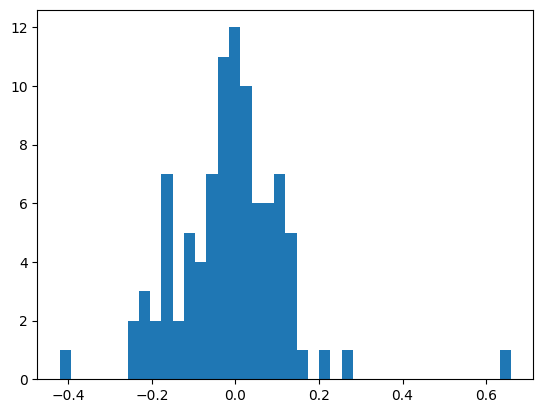

In [10]:
data = np.array(H_dis_list[:,0])
print (np.mean(H_dis_list[:,0]))
plt.hist(data, bins=40)

# Gaussian representation

In [14]:
# Needed for both Gaussian and Non-Gaussian

# Sample data: Replace this with your list of values

# 0 = HG method
# 1 = HG1G2 method
data = np.array(H_dis_list[:,1])

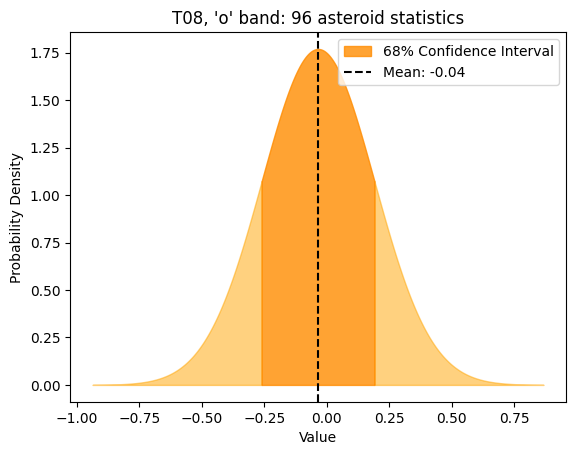

Mean: -0.035
Standard Deviation: 0.225
68% Confidence Interval: (-0.26043494944652595, 0.19028094918990274)


In [15]:
################### SAVE FILE NAME #####################################
save_name = "Gaussian_{}".format(sheet_name)

# Calculate mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data, ddof=1)  # Using sample standard deviation (ddof=1)

# Generate Gaussian distribution
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
pdf = norm.pdf(x, mean, std_dev)

# Calculate 68% confidence interval
conf_interval = (mean - std_dev, mean + std_dev)


x_fill = np.linspace(conf_interval[0], conf_interval[1], 500)
pdf_fill = norm.pdf(x_fill, mean, std_dev)

# Fill the outer region (outside 68% confidence interval)
x_outer_left = np.linspace(mean - 4*std_dev, conf_interval[0], 500)
x_outer_right = np.linspace(conf_interval[1], mean + 4*std_dev, 500)
pdf_outer_left = norm.pdf(x_outer_left, mean, std_dev)
pdf_outer_right = norm.pdf(x_outer_right, mean, std_dev)

plt.fill_between(x_outer_left, pdf_outer_left, color="orange", alpha=0.5)
plt.fill_between(x_outer_right, pdf_outer_right, color="orange", alpha=0.5)

# Fill the 68% confidence interval (darker orange)
plt.fill_between(x_fill, pdf_fill, color="darkorange", alpha=0.8, label="68% Confidence Interval")

# Labels and legend
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.title("T08, 'o' band: 96 asteroid statistics")
plt.axvline(mean, color='black', linestyle='dashed', label=f"Mean: {mean:.2f}")

plt.legend()
plt.savefig(save_name)
# Show plot
plt.show()

# Print results
print(f"Mean: {mean:.3f}")
print(f"Standard Deviation: {std_dev:.3f}")
print(f"68% Confidence Interval: {conf_interval}")


# Non-Gaussian representation

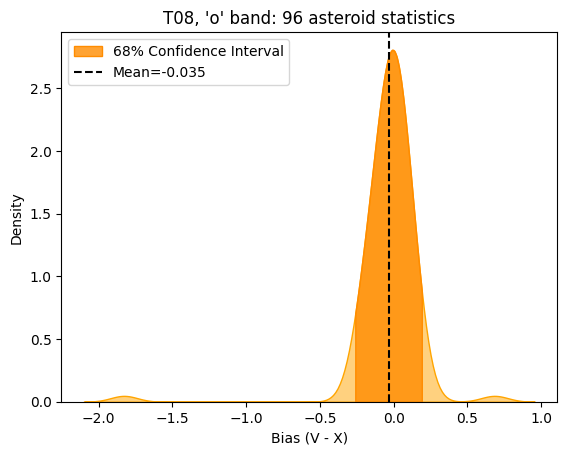

Mean: -0.035
Standard Deviation: 0.225
68% Confidence Interval: (-0.26043494944652595, 0.19028094918990274)


In [16]:
################### SAVE FILE NAME #####################################
save_name = "Non-Gaussian_{}".format(sheet_name)



# Calculate mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data, ddof=1)

# Create KDE plot (smooth histogram)
sns.kdeplot(data, color="orange", fill=True, alpha=0.5)

# Define the 68% confidence interval
conf_interval = (mean - std_dev, mean + std_dev)

# Shade the 68% confidence region (dark orange)
x_fill = np.linspace(conf_interval[0], conf_interval[1], 500)
sns.kdeplot(data, fill=True, color="darkorange", alpha=0.8, clip=conf_interval, label="68% Confidence Interval")

# Add a vertical line for the mean
plt.axvline(mean, color='black', linestyle='dashed', label=f"Mean={mean:.3f}")

# Labels and legend
plt.xlabel("Bias (V - X)")
plt.ylabel("Density")
plt.title("T08, 'o' band: 96 asteroid statistics")
plt.legend()
#plt.grid()
plt.savefig(save_name)
# Show plot
plt.show()

# Print results
print(f"Mean: {mean:.3f}")
print(f"Standard Deviation: {std_dev:.3f}")
print(f"68% Confidence Interval: {conf_interval}")


# MISC

### For finding the matching asteroids with some databases

In [99]:
import re

def extract_asteroid_data(filename):
    asteroid_ids = []
    H_values = []
    G_values = []
    
    # Match asteroid ID in the first 29 characters (e.g., "(26760)")
    asteroid_id_re = re.compile(r'^\s*\((\d+)\)')
    
    # This regex looks for a closing bracket, then optional spaces,
    # then a magnitude system indicator (1–2 uppercase letters),
    # then H value, its error, G value, and its error.
    # In your sample, this matches: "] R  15.09 0.1   0.05 0.05"
    mag_re = re.compile(
        r'\]\s*([A-Z]{1,2})\s+([-+]?\d*\.\d+|\d+)\s+'
        r'([-+]?\d*\.\d+|\d+)\s+([-+]?\d*\.\d+|\d+)\s+'
        r'([-+]?\d*\.\d+|\d+)'
    )
    
    with open(filename, 'r') as f:
        for line in f:
            line = line.rstrip('\n')
            if not line.strip() or line.startswith("AsterId"):
                continue  # skip header and empty lines

            # Extract asteroid ID from the first 29 characters.
            id_match = asteroid_id_re.match(line[:29])
            if not id_match:
                continue
            asteroid_id = int(id_match.group(1))
            
            # Look for the magnitude fields after the closing bracket.
            mag_match = mag_re.search(line)
            if not mag_match:
                continue  # Skip if H and G are not provided.
            
            try:
                # According to our regex:
                # group(2) is H, group(4) is G.
                H_val = float(mag_match.group(2))
                G_val = float(mag_match.group(4))
            except ValueError:
                continue
            
            asteroid_ids.append(asteroid_id)
            H_values.append(H_val)
            G_values.append(G_val)
    
    return asteroid_ids, H_values, G_values

if __name__ == '__main__':
    filename = r'C:\Users\nagai\Documents\Asteroid work\Database\newres.txt'
    ids, H_list, G_list = extract_asteroid_data(filename)


In [97]:
asteroid_ids = []
for excel_name in excel_list:
    asteroid_numb = int(excel_name.split("-")[0])
    asteroid_ids.append(asteroid_numb)

In [98]:
[i for i in ids if i in asteroid_ids]

[1951, 2131]

In [101]:
len(H_list)

867

In [94]:
ids

[]